In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backend_bases import FigureCanvasBase
from matplotlib.lines import Line2D
import random
import matplotlib.patches as mpatches
from sklearn.preprocessing import MinMaxScaler
#pd.set_option('max_rows', 20)
import plotly.express as px 
import plotly.io as pio 
pio.renderers.default = 'browser'
import seaborn as sns 
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler 
from scipy import stats
import matplotlib.pyplot as plt

import ast

import plotly.graph_objs as gobj
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import nltk 
from nltk.stem.porter import PorterStemmer

from warnings import simplefilter
simplefilter("ignore")


import plotly.express as px

In [2]:
df= pd.read_csv(r"C:\Users\Hp Pc\Downloads\archive\Top10VideoGameStocks.csv")

# DATA CLEANING AND MANIPULATION

In [3]:
df.head()

Date                         Company Ticker Symbol Currency  \
0  2000-01-01  Sony Interactive Entertainment          SONY      JPY   
1  2000-02-01  Sony Interactive Entertainment          SONY      JPY   
2  2000-03-01  Sony Interactive Entertainment          SONY      JPY   
3  2000-04-01  Sony Interactive Entertainment          SONY      JPY   
4  2000-05-01  Sony Interactive Entertainment          SONY      JPY   

        Open       High        Low      Close  Adj Close     Volume  
0  28.525000  29.168751  20.850000  25.299999  14.535083  147012000  
1  25.293751  31.475000  25.000000  31.350000  18.010864   67437000  
2  30.100000  31.299999  21.700001  28.012501  16.093437  112674000  
3  28.250000  28.250000  22.312500  22.562500  12.974537   74071000  
4  22.700001  23.481251  17.750000  18.237499  10.487453   65035500

In [4]:
df.columns

Index(['Date', 'Company', 'Ticker Symbol', 'Currency', 'Open', 'High', 'Low',
       'Close', 'Adj Close', 'Volume'],
      dtype='object')

In [5]:
df.isnull().sum()

Date             0
Company          0
Ticker Symbol    0
Currency         0
Open             0
High             0
Low              0
Close            0
Adj Close        0
Volume           0
dtype: int64

In [6]:
df.describe()

Open         High          Low        Close    Adj Close  \
count  2209.000000  2209.000000  2209.000000  2209.000000  2209.000000   
mean     56.082332    60.403246    52.123886    56.452762    54.255817   
std      88.552277    95.086684    82.698684    88.816897    87.529546   
min       0.032000     0.032000     0.025500     0.032000     0.025868   
25%       8.374000     9.225000     7.520000     8.380000     7.123526   
50%      22.362000    24.500000    20.070000    22.379999    18.641869   
75%      57.276001    61.731998    53.959999    57.459999    55.368843   
max     643.455811   714.899658   610.729919   628.245178   613.602234   

             Volume  
count  2.209000e+03  
mean   2.677228e+08  
std    4.027909e+08  
min    0.000000e+00  
25%    3.879940e+07  
50%    8.711250e+07  
75%    3.528646e+08  
max    3.044579e+09

In [7]:
df.shape

(2209, 10)

In [8]:
df.duplicated().sum()

0

In [9]:
df.columns

Index(['Date', 'Company', 'Ticker Symbol', 'Currency', 'Open', 'High', 'Low',
       'Close', 'Adj Close', 'Volume'],
      dtype='object')

In [10]:
df['Months']=pd.to_datetime(df['Date']).dt.strftime('%b')

In [11]:
df['Months']

0       Jan
1       Feb
2       Mar
3       Apr
4       May
       ... 
2204    Jun
2205    Jul
2206    Aug
2207    Sep
2208    Oct
Name: Months, Length: 2209, dtype: object

In [12]:
df['Day of the week']=pd.to_datetime(df['Date']).dt.strftime('%a')

In [13]:
df['Day of the week']

0       Sat
1       Tue
2       Wed
3       Sat
4       Mon
       ... 
2204    Sat
2205    Mon
2206    Thu
2207    Sun
2208    Tue
Name: Day of the week, Length: 2209, dtype: object

In [14]:
df['Year']=pd.to_datetime(df['Date']).dt.strftime('%Y')

In [15]:
df['Year']

0       2000
1       2000
2       2000
3       2000
4       2000
        ... 
2204    2024
2205    2024
2206    2024
2207    2024
2208    2024
Name: Year, Length: 2209, dtype: object

In [16]:
df['Year'].value_counts()

Year
2023    120
2022    120
2021    116
2024    100
2020     96
2019     96
2018     96
2017     96
2016     85
2013     84
2015     84
2014     84
2012     84
2011     84
2010     84
2009     84
2008     84
2007     84
2006     84
2005     84
2004     78
2001     72
2003     72
2002     72
2000     66
Name: count, dtype: int64

In [18]:
df.columns

Index(['Date', 'Company', 'Ticker Symbol', 'Currency', 'Open', 'High', 'Low',
       'Close', 'Adj Close', 'Volume', 'Months', 'Day of the week', 'Year'],
      dtype='object')

In [19]:
df.drop('Date',axis=1,inplace=True)

In [20]:
df.columns

Index(['Company', 'Ticker Symbol', 'Currency', 'Open', 'High', 'Low', 'Close',
       'Adj Close', 'Volume', 'Months', 'Day of the week', 'Year'],
      dtype='object')

In [23]:
# Program to calculate moving average

window_size = 3
 
i = 0
# Initialize an empty list to store moving averages
moving_averages = []
 
# Loop through the array to consider
# every window of size 3
while i < len(df['Close']) - window_size + 1:
   
    # Store elements from i to i+window_size
    # in list to get the current window
    window = df['Close'][i : i + window_size]
 
    # Calculate the average of current window
    window_average = round(sum(window) / window_size, 500)
     
    # Store the average of current
    # window in moving average list
   
    moving_averages.append(window_average)
     
    # Shift window to right by one position
    i += 1
    print(moving_averages)
 
   








[28.22083346048991]
[28.22083346048991, 27.30833371480306]
[28.22083346048991, 27.30833371480306, 22.9375]
[28.22083346048991, 27.30833371480306, 22.9375, 19.8874994913737]
[28.22083346048991, 27.30833371480306, 22.9375, 19.8874994913737, 18.62916628519694]
[28.22083346048991, 27.30833371480306, 22.9375, 19.8874994913737, 18.62916628519694, 20.166666666666668]
[28.22083346048991, 27.30833371480306, 22.9375, 19.8874994913737, 18.62916628519694, 20.166666666666668, 20.608333587646484]
[28.22083346048991, 27.30833371480306, 22.9375, 19.8874994913737, 18.62916628519694, 20.166666666666668, 20.608333587646484, 19.879166920979817]
[28.22083346048991, 27.30833371480306, 22.9375, 19.8874994913737, 18.62916628519694, 20.166666666666668, 20.608333587646484, 19.879166920979817, 17.229166666666668]
[28.22083346048991, 27.30833371480306, 22.9375, 19.8874994913737, 18.62916628519694, 20.166666666666668, 20.608333587646484, 19.879166920979817, 17.229166666666668, 15.133333206176758]
[28.2208334604899

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



[28.22083346048991, 27.30833371480306, 22.9375, 19.8874994913737, 18.62916628519694, 20.166666666666668, 20.608333587646484, 19.879166920979817, 17.229166666666668, 15.133333206176758, 14.50333309173584, 14.303999900817871, 14.487333297729492, 14.693999926249186, 15.133333206176758, 14.703333218892416, 12.89466667175293, 10.681333223978678, 8.507999897003174, 7.75333309173584, 7.939999898274739, 8.733333428700766, 9.170666694641113, 9.070666631062826, 9.510666529337565, 10.140000025431315, 10.934000015258789, 11.02733325958252, 10.435999870300293, 9.462666511535645, 8.66266663869222, 8.523333231608072, 8.579333305358887, 8.59333324432373, 8.37399991353353, 7.948666572570801, 7.536666552225749, 6.522666613260905, 5.813999970753987, 5.338666598002116, 5.769333203633626, 6.143333276112874, 6.596666653951009, 6.863333384195964, 6.956666628519694, 6.947999954223633, 7.311333338419597, 7.750666618347168, 8.226666768391928, 8.076666673024496, 7.8053334554036455, 7.554666678110759, 7.304666678

In [24]:
df['Daily Return']= df['Close'].pct_change()

In [25]:
df.columns

Index(['Company', 'Ticker Symbol', 'Currency', 'Open', 'High', 'Low', 'Close',
       'Adj Close', 'Volume', 'Months', 'Day of the week', 'Year',
       'Daily Return'],
      dtype='object')

In [26]:
df.head()

Company Ticker Symbol Currency       Open  \
0  Sony Interactive Entertainment          SONY      JPY  28.525000   
1  Sony Interactive Entertainment          SONY      JPY  25.293751   
2  Sony Interactive Entertainment          SONY      JPY  30.100000   
3  Sony Interactive Entertainment          SONY      JPY  28.250000   
4  Sony Interactive Entertainment          SONY      JPY  22.700001   

        High        Low      Close  Adj Close     Volume Months  \
0  29.168751  20.850000  25.299999  14.535083  147012000    Jan   
1  31.475000  25.000000  31.350000  18.010864   67437000    Feb   
2  31.299999  21.700001  28.012501  16.093437  112674000    Mar   
3  28.250000  22.312500  22.562500  12.974537   74071000    Apr   
4  23.481251  17.750000  18.237499  10.487453   65035500    May   

  Day of the week  Year  Daily Return  
0             Sat  2000           NaN  
1             Tue  2000      0.239130  
2             Wed  2000     -0.106459  
3             Sat  2000     -0.194556  
4             Mon  2000     -0.191690

In [65]:
### Create column 'season' ###
Q1 = ['Jan','Feb','Mar']
Q2 = ['Apr','May','Jun']
Q3 = ['Jul','Aug','Sep']
Q4 = ['Oct','Nov','Dec']

def month_handler(row):
    if row['Months'] in Q1:
        return 'Q1'
    if row['Months'] in Q2:
        return 'Q2'
    if row['Months'] in Q3:
        return 'Q3'
    if row['Months'] in Q4:
        return 'Q4'
df['Season'] = df.apply(month_handler,axis=1)

In [66]:
df.columns

Index(['Company', 'Ticker Symbol', 'Currency', 'Open', 'High', 'Low', 'Close',
       'Adj Close', 'Volume', 'Months', 'Day of the week', 'Year',
       'Daily Return', 'Season'],
      dtype='object')

# DATA VISUALIZATION

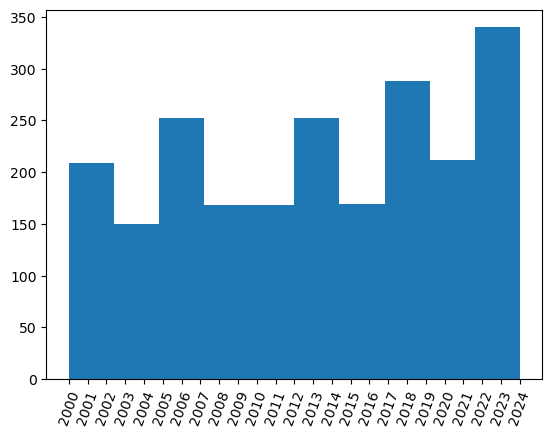

In [70]:
plt.hist(df['Year'])
plt.xticks(rotation=70)
plt.show()

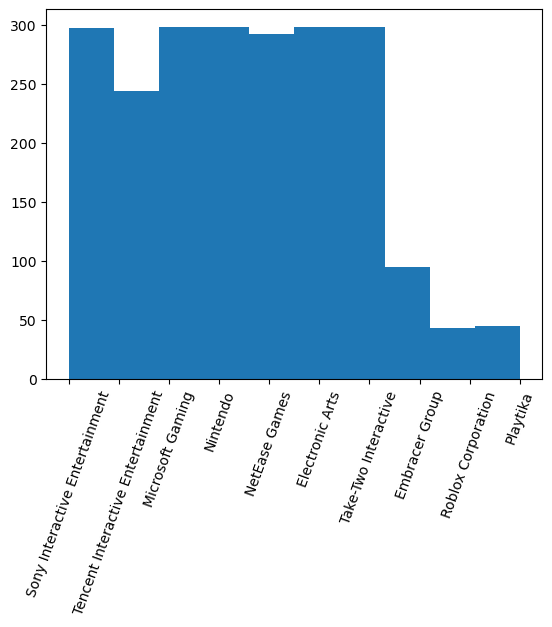

In [68]:
plt.hist(df['Company'])
plt.xticks(rotation=70)
plt.show()

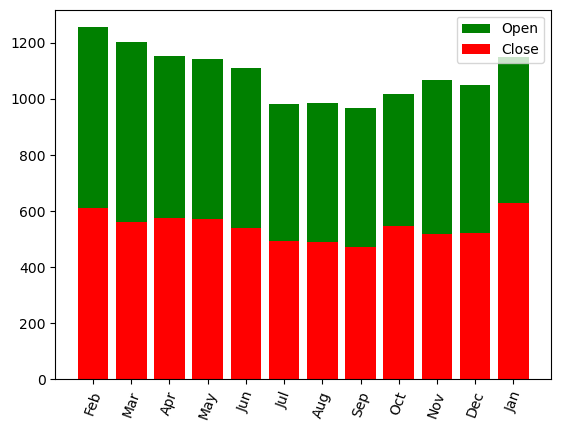

In [69]:
plt.bar(df['Months'],df['Open'],bottom=df['Close'],color='green',label='Open')
plt.bar(df['Months'],df['Close'], color='red',label='Close')
plt.xticks(rotation=70)
plt.legend(loc= 'upper right')
plt.show()

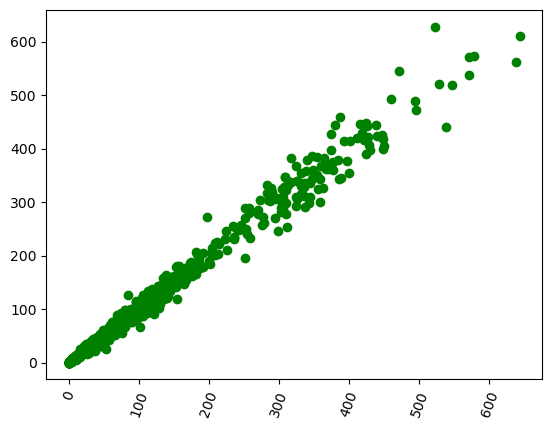

In [27]:
plt.scatter(df['Open'],df['Close'],color='green')

plt.xticks(rotation=70)
plt.show()

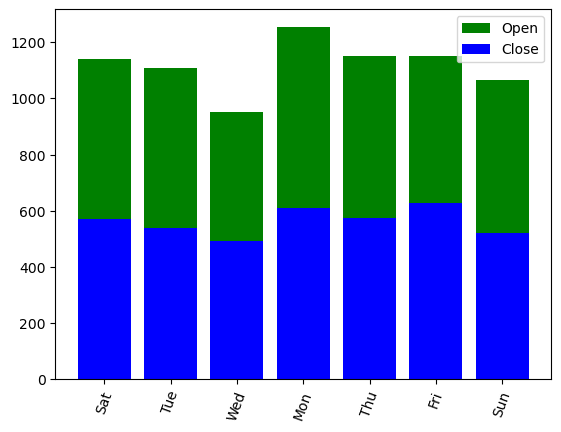

In [28]:
date = df['Day of the week']

plt.bar(date,df['Open'],bottom=df['Close'],color='green',label='Open')
plt.bar(date,df['Close'], color='blue',label='Close')
plt.xticks(rotation=70)
plt.legend(loc= 'upper right')
plt.show()

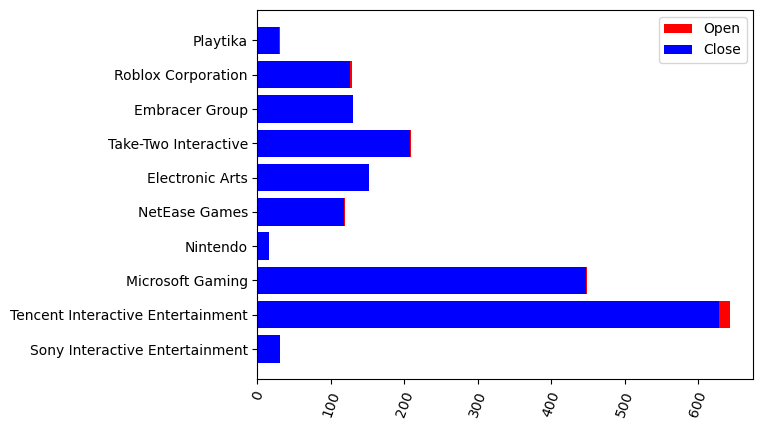

In [31]:
plt.barh(df['Company'],df['Open'],color='red',label='Open')
plt.barh(df['Company'],df['Close'], color='blue',label='Close')
plt.xticks(rotation=70)
plt.legend(loc= 'upper right')
plt.show()

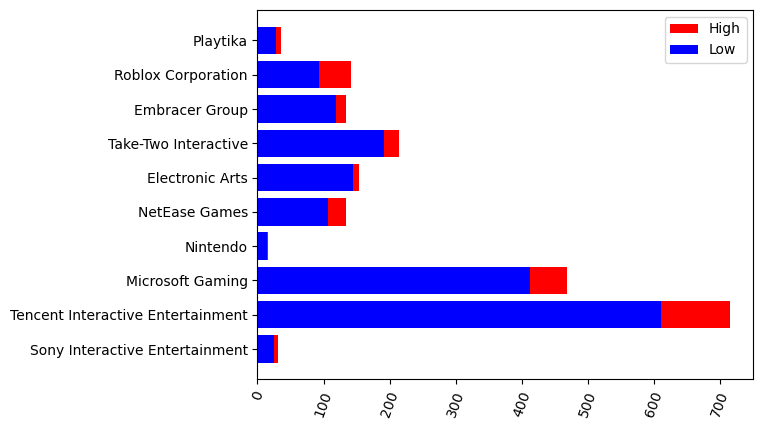

In [32]:
plt.barh(df['Company'],df['High'],color='red',label='High')
plt.barh(df['Company'],df['Low'], color='blue',label='Low')
plt.xticks(rotation=70)
plt.legend(loc= 'upper right')
plt.show()

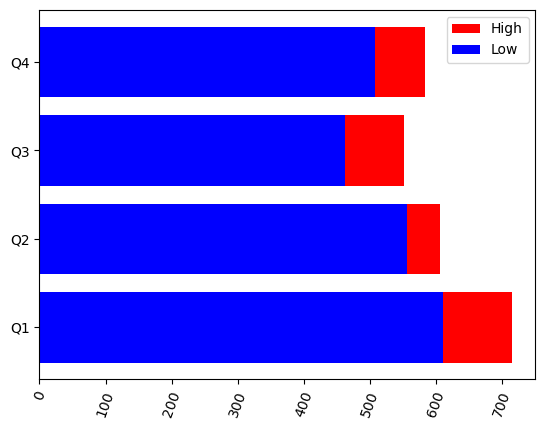

In [33]:
plt.barh(df['Season'],df['High'],color='red',label='High')
plt.barh(df['Season'],df['Low'], color='blue',label='Low')
plt.xticks(rotation=70)
plt.legend(loc= 'upper right')
plt.show()

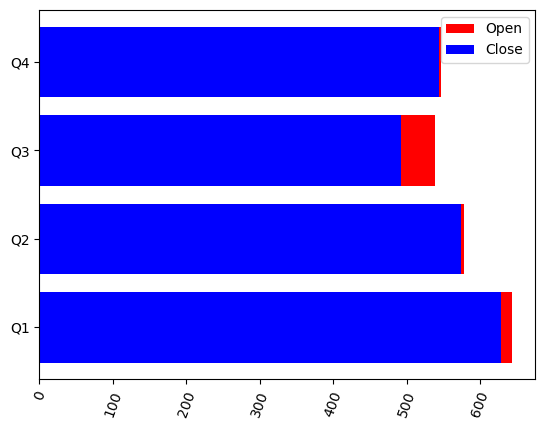

In [34]:
plt.barh(df['Season'],df['Open'],color='red',label='Open')
plt.barh(df['Season'],df['Close'], color='blue',label='Close')
plt.xticks(rotation=70)
plt.legend(loc= 'upper right')
plt.show()

In [35]:
df.dropna(inplace=True)

In [36]:
df.shape

(2208, 14)

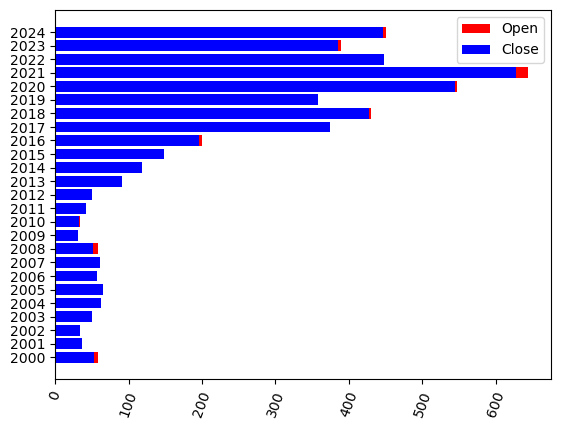

In [37]:
plt.barh(df['Year'],df['Open'],color='red',label='Open')
plt.barh(df['Year'],df['Close'], color='blue',label='Close')
plt.xticks(rotation=70)
plt.legend(loc= 'upper right')
plt.show()

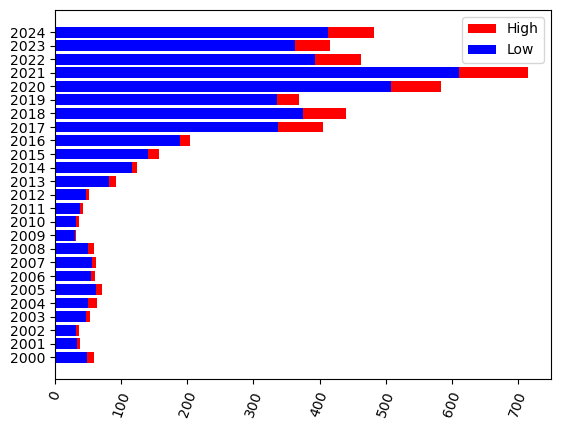

In [38]:
plt.barh(df['Year'],df['High'],color='red',label='High')
plt.barh(df['Year'],df['Low'], color='blue',label='Low')
plt.xticks(rotation=70)
plt.legend(loc= 'upper right')
plt.show()

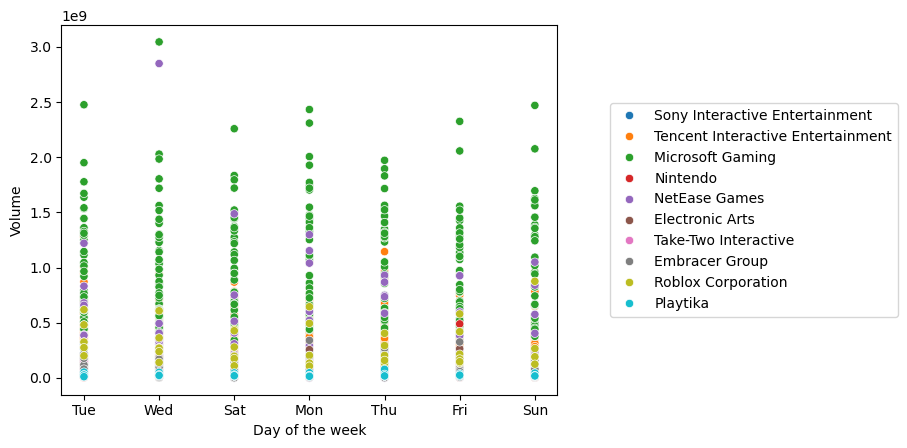

In [39]:
sns.scatterplot(data=df, x="Day of the week", y="Volume", hue="Company")
plt.legend(loc='center right',bbox_to_anchor= (1, 0, 0.7, 1))
plt.show()

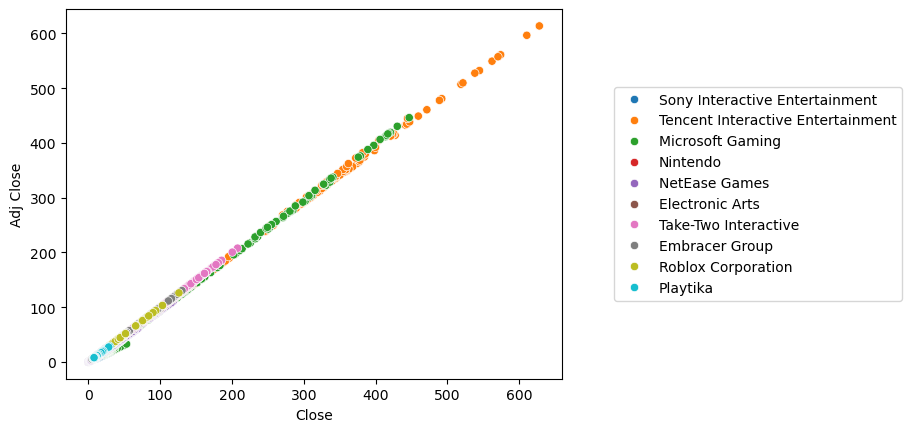

In [40]:
sns.scatterplot(data=df, x="Close", y="Adj Close", hue="Company")
plt.legend(loc='center right',bbox_to_anchor= (1, 0, 0.7, 1))
plt.show()

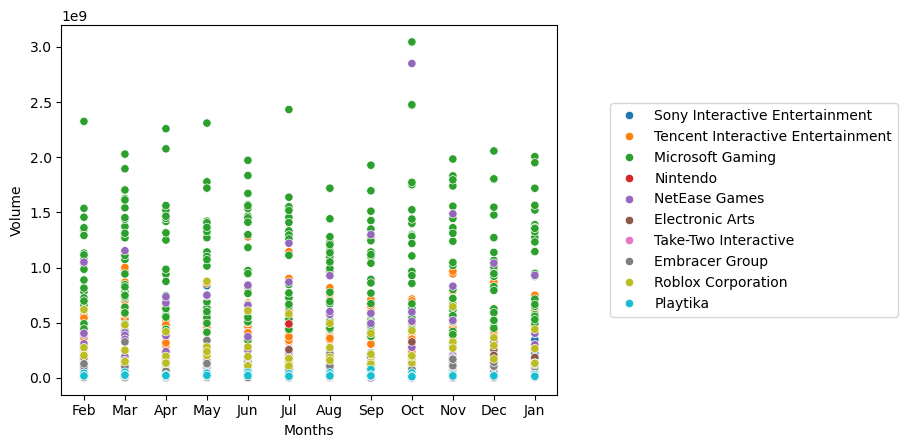

In [41]:
sns.scatterplot(data=df, x="Months", y="Volume", hue="Company")
plt.legend(loc='center right',bbox_to_anchor= (1, 0, 0.7, 1))
plt.show()

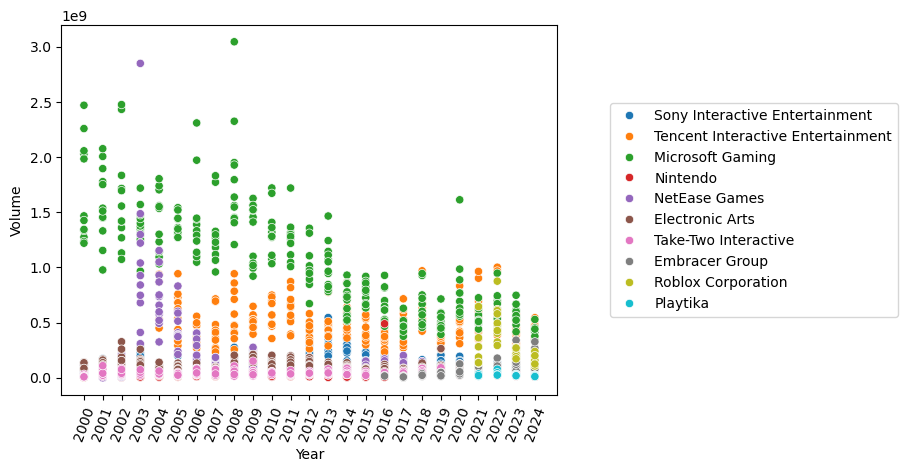

In [50]:
sns.scatterplot(data=df, x="Year", y="Volume", hue="Company")
plt.xticks(rotation=70)
plt.legend(loc='center right',bbox_to_anchor= (1, 0, 0.7, 1))
plt.show()

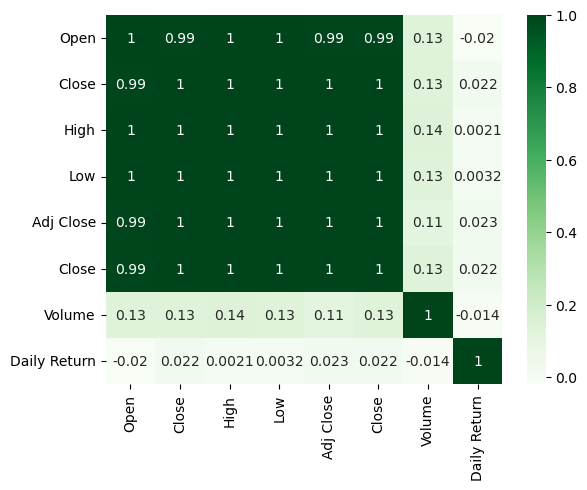

In [43]:
#Correlation Matrix
#Creating a correlation matrix using Baidu Core Revenu,Baidu Core total cost and Opearting Income Baidu Core as rows and coloumns
sns.heatmap(df[['Open','Close','High','Low','Adj Close','Close','Volume','Daily Return']].corr(),annot= True,cmap = 'Greens')
plt.show()
#In this visualiazation its observable that Baidu Core Revenu and Baidu Core total cost and expenses has a strong correlation of 0.87,which is good but
#not perfect.This only suggest there's a strong relationship between them,as one increases the other increases and vice versa


In [44]:
df['Currency'].value_counts()

Currency
USD    1572
JPY     297
HKD     244
SEK      95
Name: count, dtype: int64

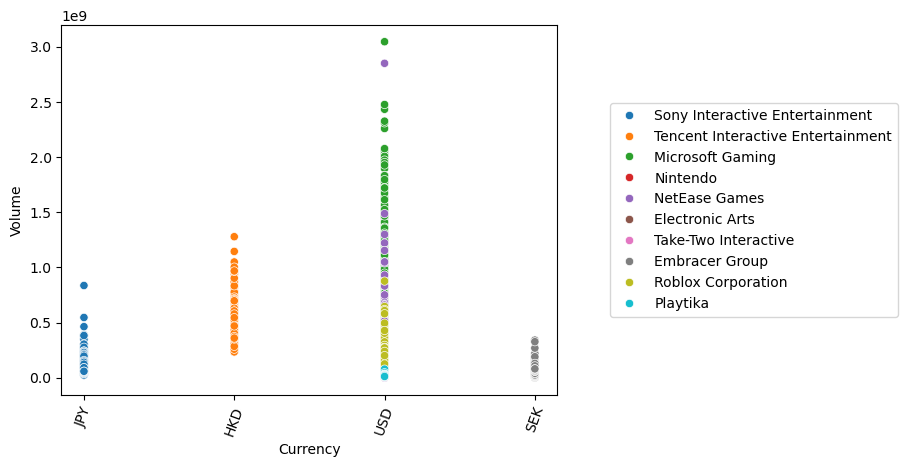

In [64]:
sns.scatterplot(data=df, x="Currency", y="Volume", hue="Company")
plt.xticks(rotation=70)
plt.legend(loc='center right',bbox_to_anchor= (1, 0, 0.7, 1))
plt.show()

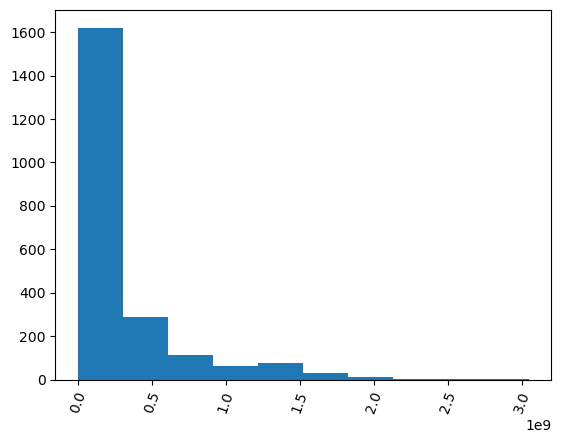

In [45]:
plt.hist(df['Volume'])
plt.xticks(rotation=70)
plt.show()

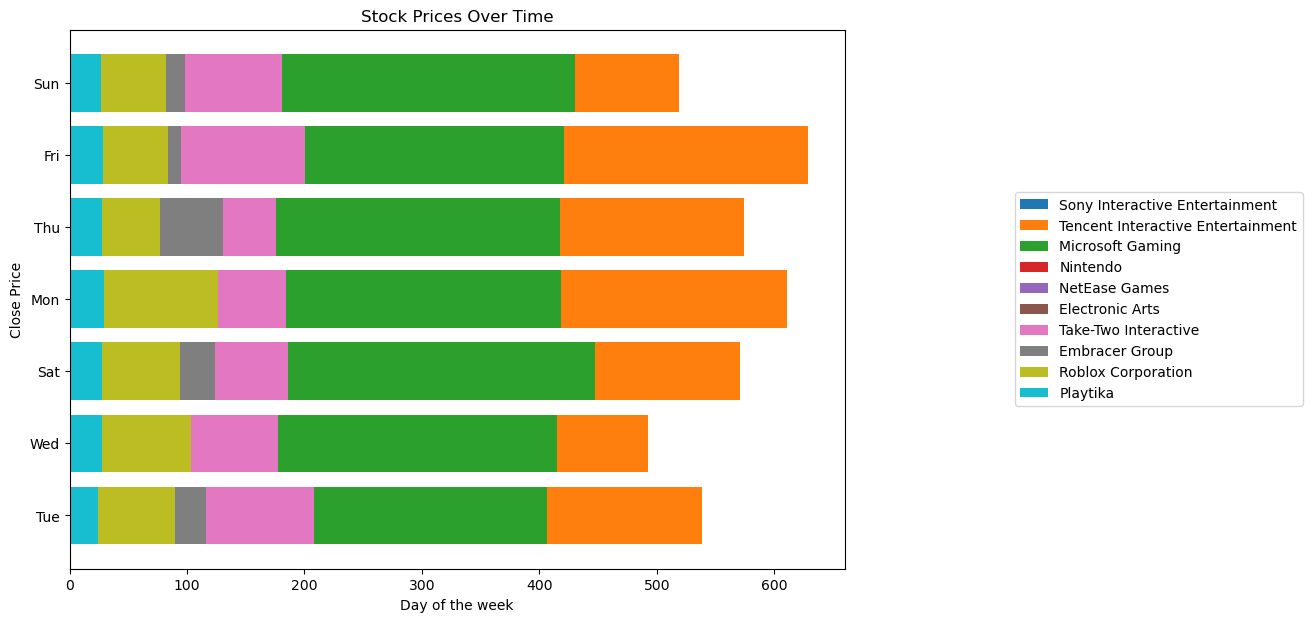

In [59]:
# stock prices over time
plt.figure(figsize=(10, 7))
for company in df['Company'].unique():
    company_data = df[df['Company'] == company]
    plt.barh(company_data['Day of the week'], company_data['Close'], label=company)
plt.title('Stock Prices Over Time')
plt.xlabel('Day of the week')
plt.ylabel('Close Price')
plt.legend(loc='center right',bbox_to_anchor= (1, 0, 0.6, 1))
plt.show()

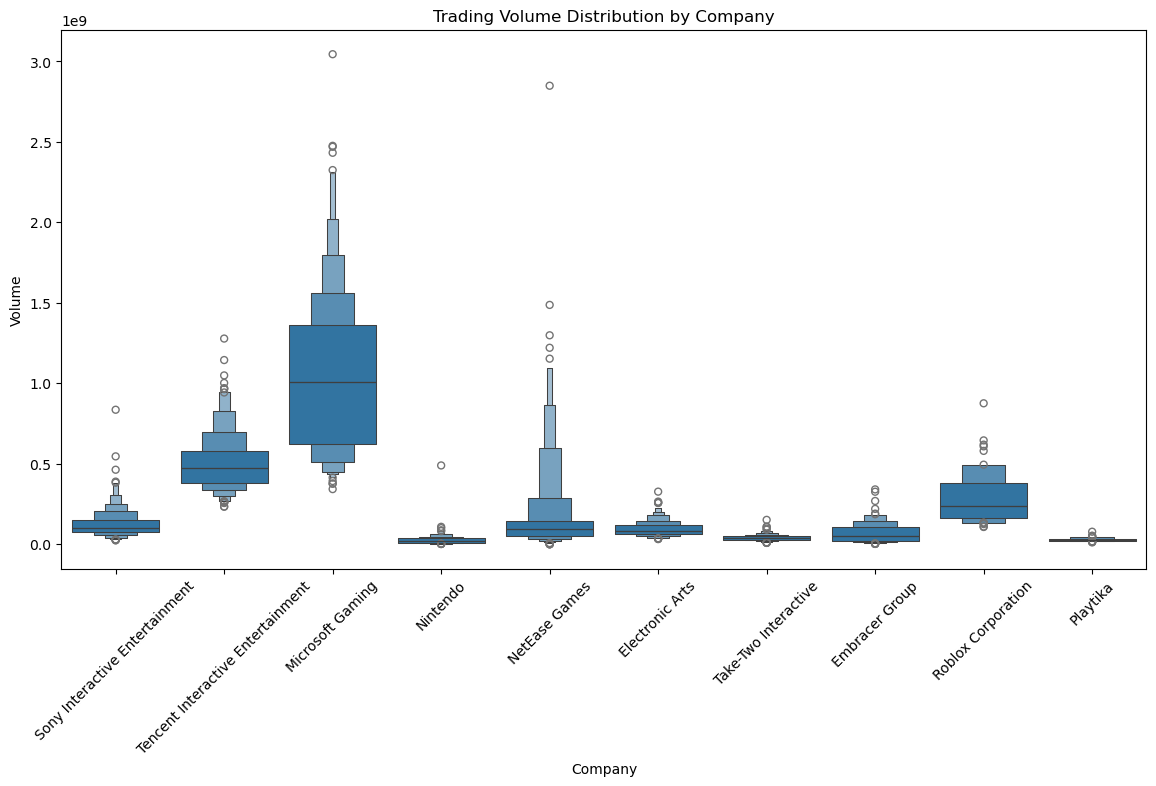

In [60]:
# Plot trading volume
plt.figure(figsize=(14, 7))
sns.boxenplot(x='Company', y='Volume', data=df)
plt.title('Trading Volume Distribution by Company')
plt.xticks(rotation=45)
plt.show()

# PREDICTIVE ANALYSIS

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#  data
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [63]:
# predictions
y_pred = model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
mse

17.67252487146945

# KEY NOTE

We worked on the Top 10 Video game stock,we did some data cleaning to ensure there was no missing value and to be sure the data was clean to work with before we proceeded to analyize. We analyzed the data by visualizing the quarterly income for each seasons, the stock prices and analysed correlation. We built a simple regression to predict the future stockprice.
From my observation, Microsoft gaming has the highest income while Playtika had the lowest over, Tencent Interactive Emtertainment had the highest close and adj close.